In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/AirQuality.csv'
ar = pd.read_csv(file_path, delimiter = ';')

In [ ]:
# getting the numerical estimates of all the numerical column
ar.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [ ]:
#Dropping CO(GT) and Unnamed columns
ar.drop(['CO(GT)','Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [ ]:
#Formatting some object columns from strings to floats

ar.replace(to_replace=',',value='.',regex=True,inplace=True)

for i in 'C6H6(GT) T RH AH'.split():
    ar[i] = pd.to_numeric(ar[i],errors='coerce')

In [ ]:
#Replacing null data from -200 to NaN for posterior treatment

ar.replace(to_replace=-200,value=np.nan,inplace=True)

ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.0+ MB


In [ ]:
#Formatting Date and Time to datetime type

ar['Date'] = pd.to_datetime(ar['Date'],dayfirst=True)

ar['Time'] = pd.to_datetime(ar['Time'],format= '%H.%M.%S' ).dt.time

ar.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
#Removing NMHC(GT) sensor due to amount of null values

ar.drop('NMHC(GT)', axis=1, inplace=True)

ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    8991 non-null   float64       
 3   C6H6(GT)       8991 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   NOx(GT)        7718 non-null   float64       
 6   PT08.S3(NOx)   8991 non-null   float64       
 7   NO2(GT)        7715 non-null   float64       
 8   PT08.S4(NO2)   8991 non-null   float64       
 9   PT08.S5(O3)    8991 non-null   float64       
 10  T              8991 non-null   float64       
 11  RH             8991 non-null   float64       
 12  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 962.0+ KB


In [ ]:
ar.drop(['CO(GT)']  ,axis=1, inplace=True, errors = 'ignore')
ar.drop(['NOx(GT)'] ,axis=1, inplace=True, errors = 'ignore')
ar.drop(['C6H6(GT)'],axis=1, inplace=True, errors = 'ignore')
ar.drop(['NO2(GT)'] ,axis=1, inplace=True, errors = 'ignore')
ar.head()

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
ar = ar.dropna()
percent_NaN = []
columns = ar.columns
for col in columns:
    pNaN =  (ar[col].isna().sum()/ar.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column',ascending = False)
nan_percent_df

,%_NaN_in_Column
Date,0.0
Time,0.0
PT08.S1(CO),0.0
PT08.S2(NMHC),0.0
PT08.S3(NOx),0.0
PT08.S4(NO2),0.0
PT08.S5(O3),0.0
T,0.0
RH,0.0
AH,0.0


In [ ]:
ar

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04,11:00:00,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04,12:00:00,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04,13:00:00,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(file_path ,sep=";", decimal=",",header=0)


In [ ]:
df.head()
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'],inplace=True)
df.dropna(inplace=True)
df.replace(to_replace=-200,value=np.nan,inplace=True)

df.drop(columns=['NMHC(GT)'],inplace=True)
df.isna().sum()

df.drop(columns=['C6H6(GT)'],inplace=True)
df.drop(columns=['NOx(GT)'],inplace=True)
df.drop(columns=['NO2(GT)'],inplace=True)
df.drop(columns=['CO(GT)'],inplace=True)

In [ ]:
df

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139


In [ ]:
col = ['PT08.S1(CO)','PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']
time_frame = df[['Date', 'Time']]
df = df[col]
df[col].dtypes
df.describe()


,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,217.080037,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813
min,647.000000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,937.000000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1063.000000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,1231.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,2040.000000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


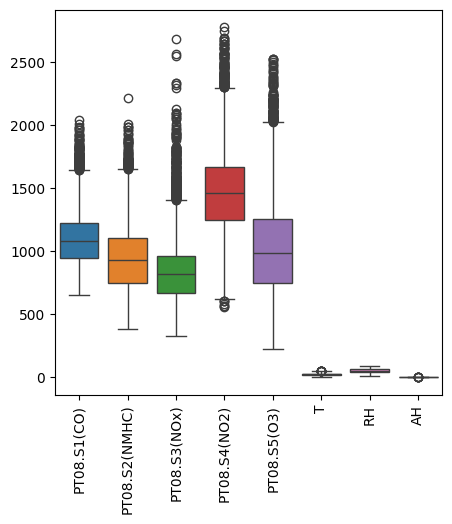

In [ ]:
for i in col:
    df[i] = df[i].fillna(df[i].mean())
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
# getting the quartile one and quartile 3 values of each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# finally calculating the interquartile range IQR
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

PT08.S1(CO)      145
PT08.S2(NMHC)     91
PT08.S3(NOx)     278
PT08.S4(NO2)     131
PT08.S5(O3)      131
T                 10
RH                 0
AH                 7
dtype: int64

In [ ]:
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))


In [ ]:
# now replacing all the outliers using the median of that particular column
for i in mask.columns:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[mask[i], i] = temp

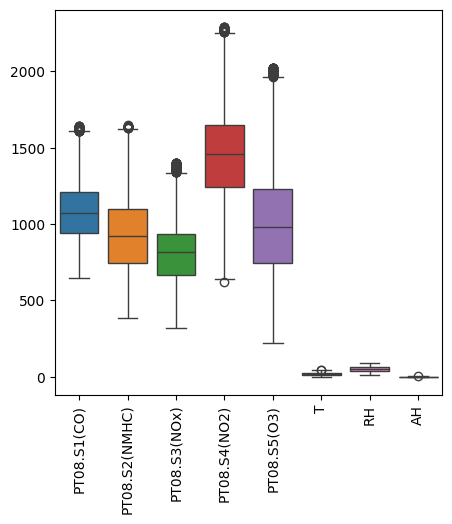

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_combined = pd.concat([time_frame, df], axis=1)

In [ ]:
df_combined['DateTime'] = pd.to_datetime(df_combined['Date'] + ' ' + df_combined['Time'], format='%d/%m/%Y %H.%M.%S')


In [ ]:
def get_season(date):
    year = date.year
    seasons = {
        'spring': (pd.Timestamp(year=year, month=3, day=21), pd.Timestamp(year=year, month=6, day=20)),
        'summer': (pd.Timestamp(year=year, month=6, day=21), pd.Timestamp(year=year, month=9, day=22)),
        'fall': (pd.Timestamp(year=year, month=9, day=23), pd.Timestamp(year=year, month=12, day=20)),
        'winter': (pd.Timestamp(year=year, month=12, day=21), pd.Timestamp(year=year, month=3, day=20)),
    }
    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    # For the end of the year wrapping around
    return 'winter'

In [ ]:
df_combined

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,10/03/2004,18.00.00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,2005-04-04 10:00:00
9353,04/04/2005,11.00.00,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,2005-04-04 11:00:00
9354,04/04/2005,12.00.00,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,2005-04-04 12:00:00
9355,04/04/2005,13.00.00,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,2005-04-04 13:00:00


In [ ]:
# Apply the function to create a 'Season' column
df_combined['Season'] = df_combined['DateTime'].apply(get_season)

# Drop the original 'Date' and 'Time' columns
df_combined = df_combined.drop(columns=['Date', 'Time'])

# Split the data into separate data frames for each season
seasons = df_combined['Season'].unique()
seasonal_dfs = {season: df_combined[df_combined['Season'] == season].reset_index(drop=True) for season in seasons}



In [ ]:
## do pca and clustering here

In [ ]:
df_combined

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Season
0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,winter
1,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,winter
2,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,winter
3,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,winter
4,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,winter
...,...,...,...,...,...,...,...,...,...,...
9352,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,2005-04-04 10:00:00,spring
9353,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,2005-04-04 11:00:00,spring
9354,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,2005-04-04 12:00:00,spring
9355,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,2005-04-04 13:00:00,spring


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

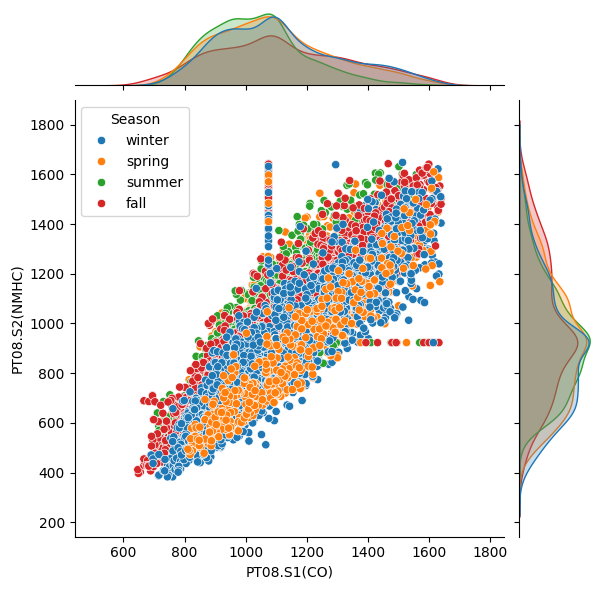

In [ ]:
sns.jointplot(df_combined, x='PT08.S1(CO)', y='PT08.S2(NMHC)', hue="Season")#, kind="kde")

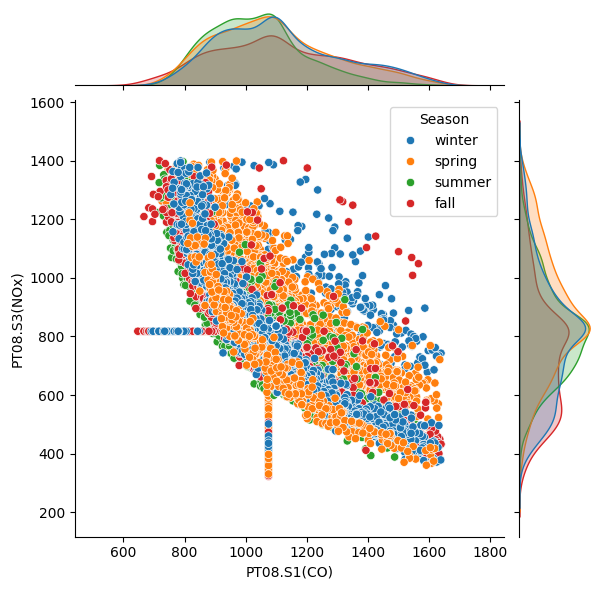

In [ ]:
sns.jointplot(df_combined, x='PT08.S1(CO)', y='PT08.S3(NOx)', hue="Season")#, kind="kde")

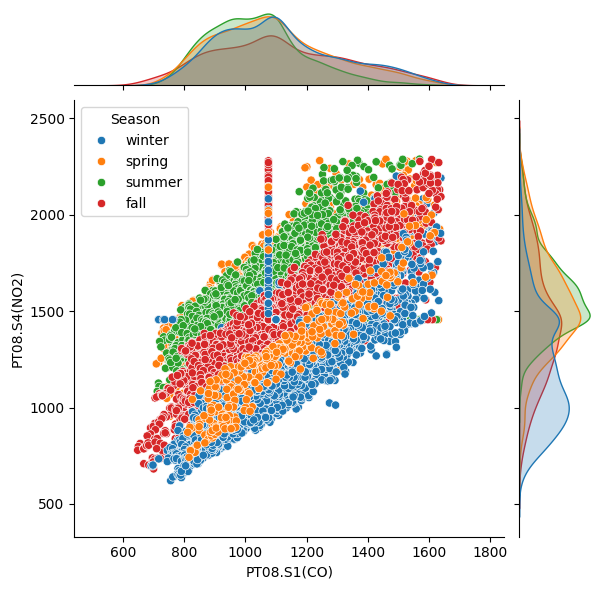

In [ ]:
sns.jointplot(df_combined, x='PT08.S1(CO)', y='PT08.S4(NO2)', hue="Season")#, kind="kde")

In [ ]:
PT08.S4(NO2)

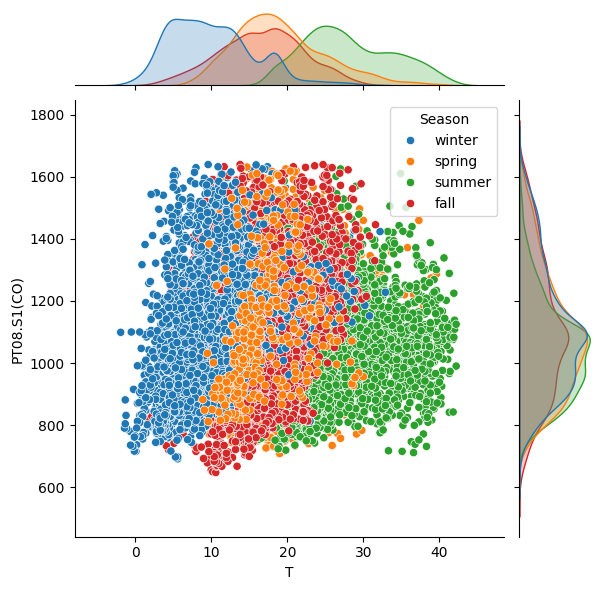

In [ ]:
sns.jointplot(df_combined, x='T', y='PT08.S1(CO)', hue="Season")

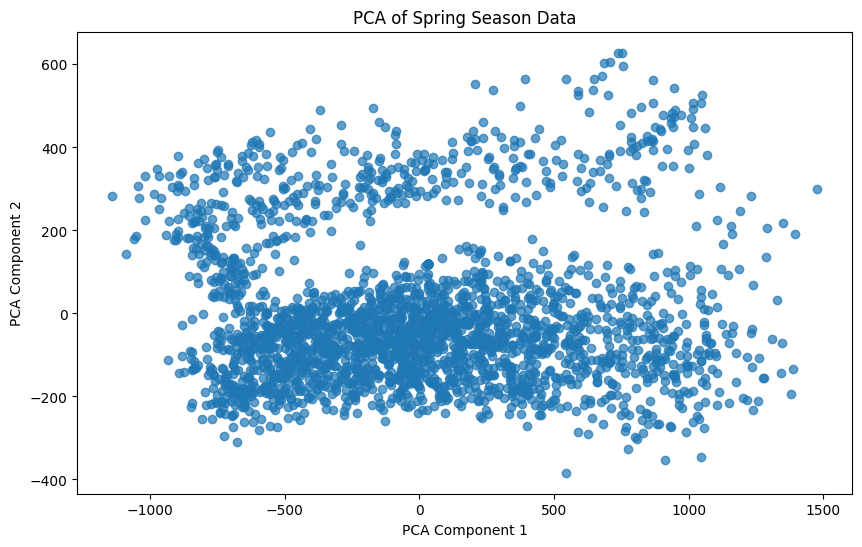

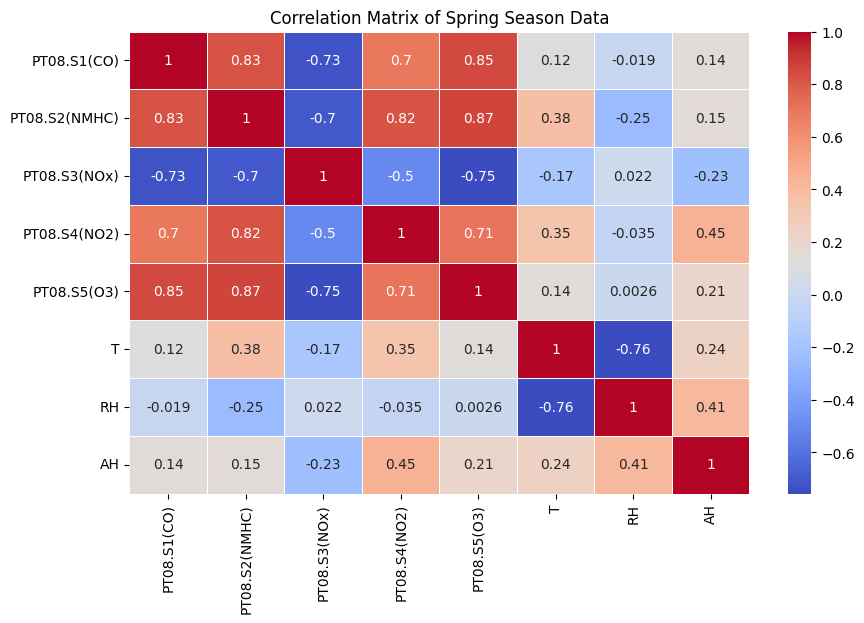

In [ ]:
# Select features for PCA and correlation
features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# Perform PCA for Spring
spring_data = seasonal_dfs['spring'][features]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spring_data)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of Spring Season Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Correlation matrix for Spring
corr_matrix = spring_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Spring Season Data')
plt.show()


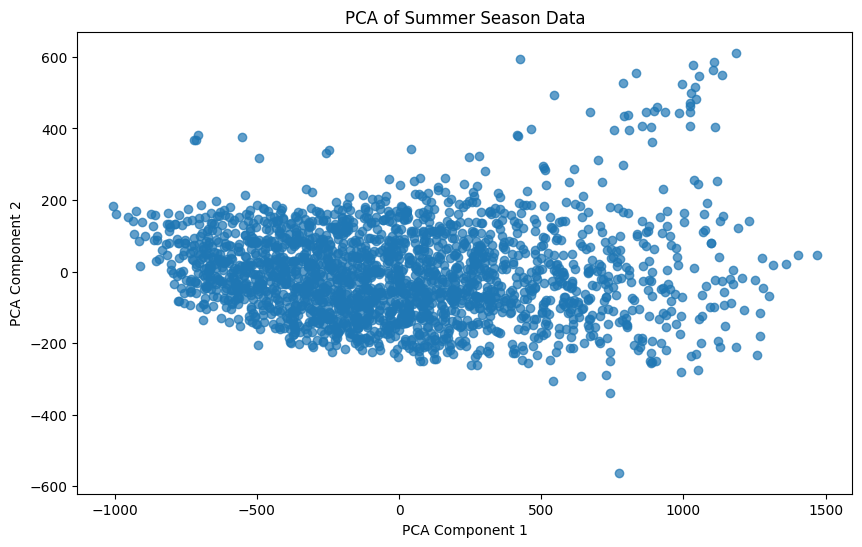

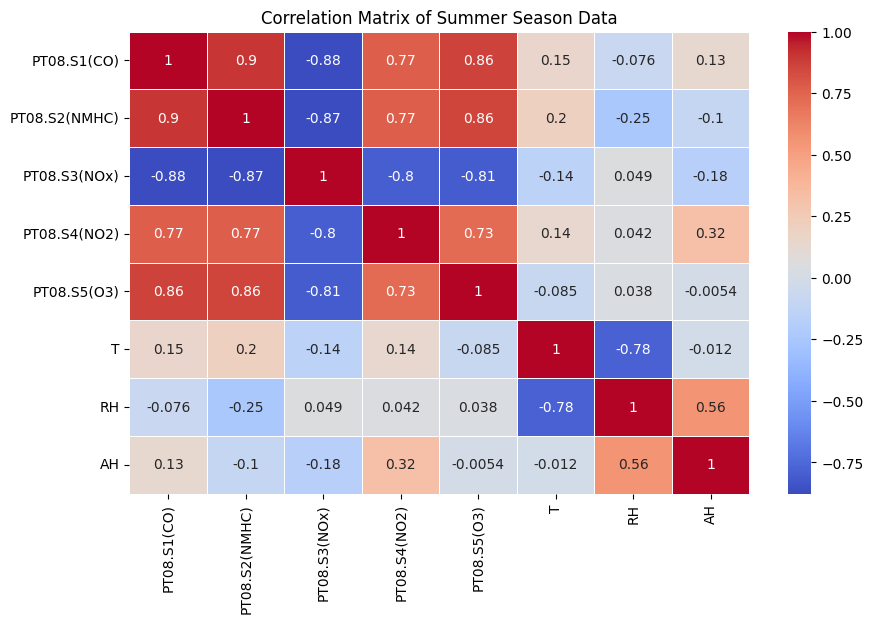

In [ ]:
# Perform PCA for Spring
spring_data = seasonal_dfs['summer'][features]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spring_data)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of Summer Season Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Correlation matrix for Spring
corr_matrix = spring_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Summer Season Data')
plt.show()


In [1]:
# Perform PCA for Spring
spring_data = seasonal_dfs['fall'][features]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spring_data)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of Fall Season Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Correlation matrix for Spring
corr_matrix = spring_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Fall Season Data')
plt.show()


NameError: name 'seasonal_dfs' is not defined

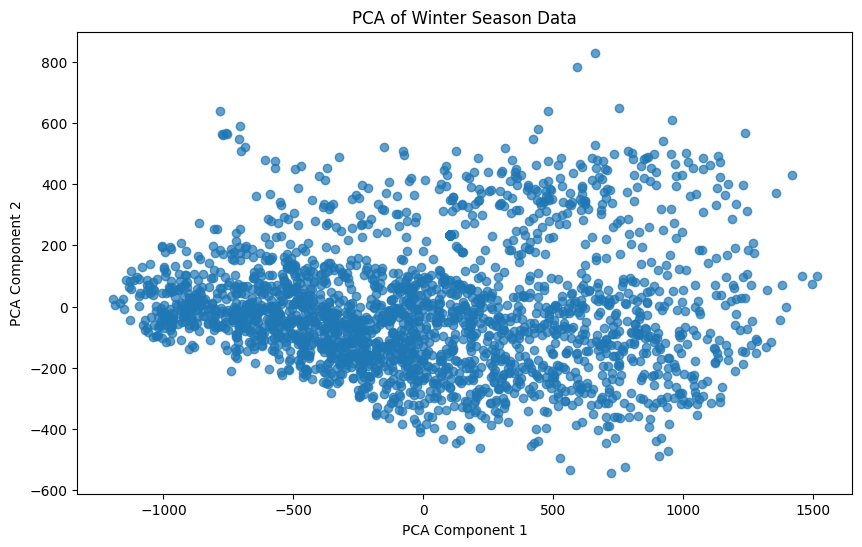

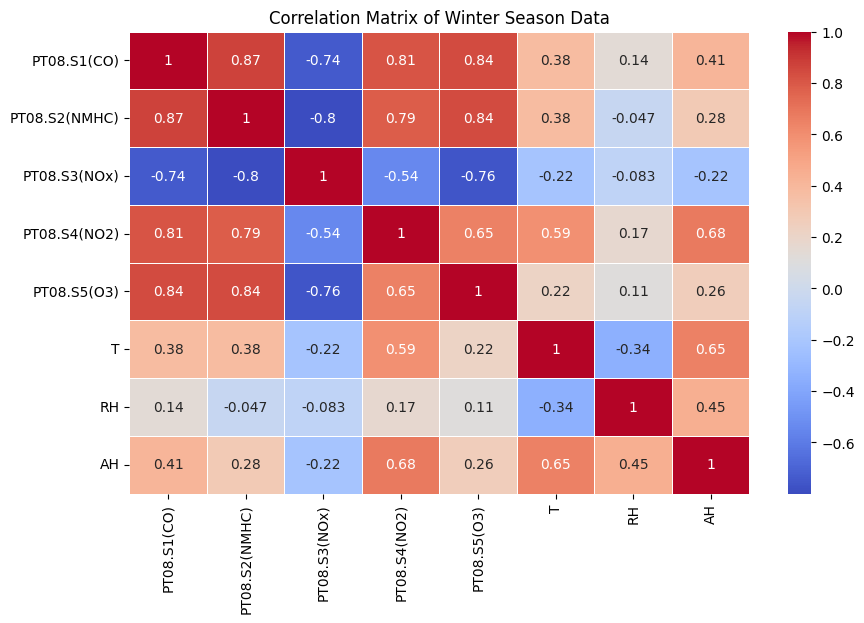

In [ ]:
# Perform PCA for Spring
spring_data = seasonal_dfs['winter'][features]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spring_data)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of Winter Season Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Correlation matrix for Spring
corr_matrix = spring_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Winter Season Data')
plt.show()


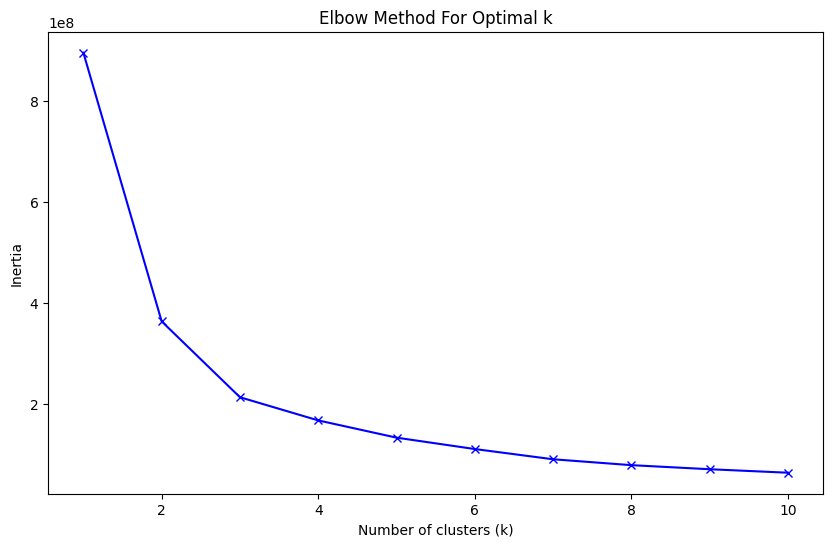

In [ ]:
# Elbow method to determine the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

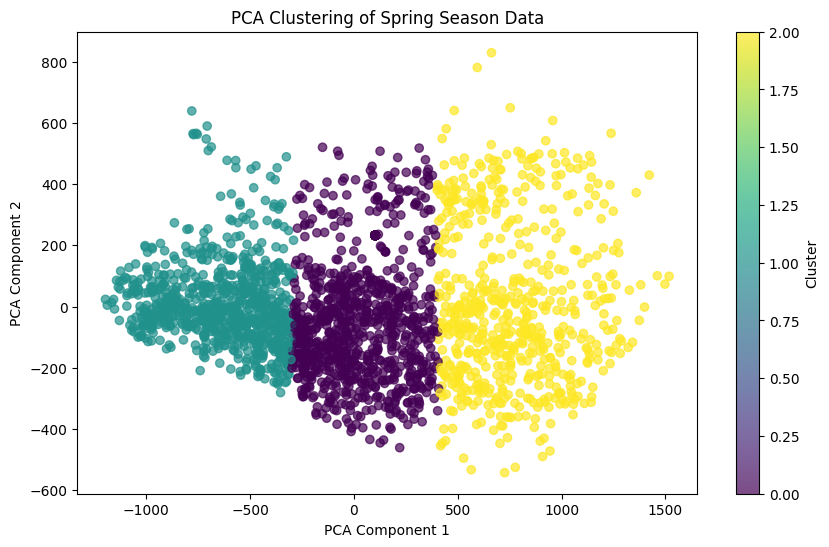

In [ ]:
# Based on the elbow plot, choose the optimal number of clusters, e.g., k = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
spring_data['Cluster'] = kmeans.fit_predict(pca_result)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=spring_data['Cluster'], cmap='viridis', alpha=0.7)
plt.title('PCA Clustering of Spring Season Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()